## 1 - Packages

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## 2 - Problem Statement
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

* You would like to expand your business to cities that may give your restaurant higher profits.
* The chain already has restaurants in various cities and you have data for profits and populations from the cities.
* You also have data on cities that are candidates for a new restaurant.
    * For these cities, you have the city population.
Can you use the data to help you identify which cities may potentially give your business higher profits?



# 3 - Dataset
You will start by loading the dataset for this task.

* The load_data() function shown below loads the data into variables x_train and y_train
    * x_train is the population of a city
    * y_train is the profit of a restaurant in that city. A negative value for profit indicates a loss.
    * Both X_train and y_train are numpy arrays.

In [66]:
# load the dataset
x_train, y_train = load_data()
print(x_train.shape)

(97,)


## View The Variables


In [67]:
# print x_train
# x_train represent the city population times 10,000
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [68]:
# y_train represent the profits, unit: 10,000
print("Type of x_train:",type(y_train))
print("First five elements of x_train are:\n", y_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [69]:
# check the dimiension of the variables
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


## Visualize the data

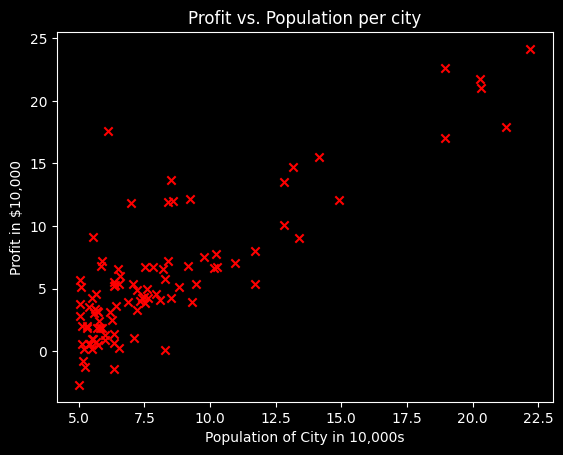

In [70]:
plt.scatter(x_train, y_train, marker='x',c = 'r')

# Set the title
plt.title("Profit vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

# 4 - Refresher on linear regression
In thi lab, model will be
    $$f_{w,b}(x) = wx + b$$

# 5 - Compute Cost
Cost function:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

### Exercise 1

In [71]:
def compute_cost(x,y,w,b):
# def compute_cost():
    """ 
    computer the cost funciotn for linear regression.
    
    Arg:
        x (narray): Shape (m,) Input to the model (Population of cities)
        y (narray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression 
            to fit the data points in x and y
    
    """
    # number of training examples
    # m = x.shape[0]
    m = x.shape[0]
    
    # cost
    total_cost = 0
    
    ### START CODE HERE ###
    for i in range(m):
        cost_cur = (w*x[i] + b - y[i])**2
        total_cost += cost_cur
    total_cost =  total_cost / 2/m
    ### END CODE HERE ###
    return total_cost
    

In [72]:
# print()
# print(x_train[3])


# print("Using X with shape (5, 1)")
# Case 3
x = np.array([1.5, 2.5, 3.5, 4.5, 1.5]).T
y = np.array([4, 7, 10, 13, 5]).T
initial_w = 1
initial_b = 0.0
# cost = target(x, y, initial_w, initial_b)
# assert np.isclose(cost, 15.325), f"Case 3: Cost must be 15.325 for a perfect prediction but got {cost}"
    
compute_cost_test(compute_cost)

NameError: name 'compute_cost_test' is not defined

# 6 - Gradient descent

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

### Exercise 2

In [58]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    for i in range(m):
        dj_db += w * x[i] + b  - y[i]
        dj_dw += ( w * x[i] + b - y[i] ) * x[i] 
        
    dj_db = dj_db / m
    dj_dw = dj_dw / m
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

In [60]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

# compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


NameError: name 'compute_gradient_test' is not defined

In [35]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


### 2.6 Learining parameter using batch gradient descent
